In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
functionals = ["blyp",
               "PBE",
               "LC-BLYP",
               "LC-wPBE",
               "bmk",
               "m062x",
               "m11",
               "b3lyp",
               "PBE0",
               "cam-b3lyp",
               "wB97XD",
                ]

func_to_name = {
    'blyp': "BLYP",
    'bmk': "BMK",
    'm11': "M11",
    'm062x': "M062X",
    'b3lyp': "B3LYP",
    'PBE0': 'PBE0',
    'cam-b3lyp': 'CAM-B3LYP',
    'LC-wPBE': 'LC-wPBE',
    'LC-BLYP':'LC-BLYP',
    'wB97XD': 'wB97XD',
    'PBE': 'PBE'
}

In [3]:
dfS1 = pd.read_csv("S1.csv")
dfT1 = pd.read_csv("T1.csv")
dfT2 = pd.read_csv("T2.csv")

dfFC = pd.DataFrame()
dfSC = pd.DataFrame()

dfFC["DRC"] = dfS1["DRC"]
dfFC["S2"] = dfS1["S2"]

dfSC["DRC"] = dfS1["DRC"]
dfSC["S2"] = dfS1["S2"]


for f in functionals:
    dfFC['FC({})'.format(f)] = 2*dfT1["T1({})".format(f)] - dfS1["S1({})".format(f)]
    dfFC['FC({}, TDA)'.format(f)] = 2*dfT1["T1({}, TDA)".format(f)] - dfS1["S1({}, TDA)".format(f)]
    
    dfSC['SC({})'.format(f)] = 2*dfT1["T1({})".format(f)] - dfT2["T2({})".format(f)]
    dfSC['SC({}, TDA)'.format(f)] = 2*dfT1["T1({}, TDA)".format(f)] - dfT2["T2({}, TDA)".format(f)] 
    
dfFC["FC(MC)"] = 2*dfT1["T1(MC)"] - dfS1["S1(MC)"]
dfSC['SC(MC)'.format(f)] = 2*dfT1["T1(MC)"] - dfT2["T2(MC)"]

In [21]:
def calc_mae_mse(df,state, tda = False):
    if (tda): 
        print("{}, TDA".format(state))
    else:
        print(state)
    out_df = pd.DataFrame()
    func, mae, mse = [], [], []
    for f in functionals:
        func.append(func_to_name[f])
        lab = '{}({})'.format(state, f)
        if (tda == True):
            lab = '{}({}, TDA)'.format(state, f)
        deltaE = df["{}(MC)".format(state)] - df[lab]
        mse.append(deltaE.mean())
        #print(deltaE, np.abs(deltaE))
        mae.append(np.abs(deltaE).mean())
    
    out_df["Functional"] = func
    out_df["MAE, eV"] = mae
    out_df["MSE, eV"] = mse
    return out_df
        
            

In [22]:
calc_mae_mse(dfS1,"S1")

S1


,Functional,"MAE, eV","MSE, eV"
0,BLYP,0.294464,0.218066
1,PBE,0.288968,0.155154
2,LC-BLYP,0.687364,-0.687364
3,LC-wPBE,0.632114,-0.632114
4,BMK,0.350709,-0.344316
5,M062X,0.381836,-0.368389
6,M11,0.455848,-0.425771
7,B3LYP,0.195576,-0.077829
8,PBE0,0.236880,-0.180234
9,CAM-B3LYP,0.369556,-0.364339


In [6]:
calc_mae_mse(dfS1,"S1", tda=True)

S1, TDA


,Functional,"MAE, eV","MSE, eV"
0,BLYP,0.279306,0.087086
1,PBE,0.288842,0.008956
2,LC-BLYP,0.918749,-0.918749
3,LC-wPBE,0.876066,-0.876066
4,BMK,0.568101,-0.568101
5,M062X,0.568922,-0.556019
6,M11,0.635851,-0.608569
7,B3LYP,0.285978,-0.239024
8,PBE0,0.385582,-0.367759
9,CAM-B3LYP,0.575312,-0.570179


In [7]:
calc_mae_mse(dfT1,"T1")

T1


,Functional,"MAE, eV","MSE, eV"
0,BLYP,0.207983,0.070930
1,PBE,0.218462,0.085660
2,LC-BLYP,1.133468,1.103173
3,LC-wPBE,1.258881,1.241573
4,BMK,0.348425,0.257018
5,M062X,0.346544,0.127693
6,M11,0.584971,0.470353
7,B3LYP,0.317314,0.296860
8,PBE0,0.569932,0.553428
9,CAM-B3LYP,0.692931,0.660783


In [8]:
calc_mae_mse(dfT1,"T1", tda=True)

T1, TDA


,Functional,"MAE, eV","MSE, eV"
0,BLYP,0.129973,0.023728
1,PBE,0.132452,0.019910
2,LC-BLYP,0.369937,-0.244880
3,LC-wPBE,0.309155,-0.158865
4,BMK,0.225854,-0.213410
5,M062X,0.292329,-0.273592
6,M11,0.318796,-0.287162
7,B3LYP,0.104198,-0.040517
8,PBE0,0.094991,-0.030870
9,CAM-B3LYP,0.213246,-0.128290


In [9]:
calc_mae_mse(dfT2,"T2")

T2


,Functional,"MAE, eV","MSE, eV"
0,BLYP,0.264319,0.235236
1,PBE,0.267869,0.229881
2,LC-BLYP,0.195687,0.069013
3,LC-wPBE,0.264995,0.224476
4,BMK,0.152753,-0.094217
5,M062X,0.235995,-0.162364
6,M11,0.203703,-0.077374
7,B3LYP,0.164231,0.122931
8,PBE0,0.199348,0.166391
9,CAM-B3LYP,0.152415,0.065228


In [10]:
calc_mae_mse(dfT2,"T2", tda=True)

T2, TDA


,Functional,"MAE, eV","MSE, eV"
0,BLYP,0.224397,0.185318
1,PBE,0.228529,0.170396
2,LC-BLYP,0.394151,-0.389009
3,LC-wPBE,0.285710,-0.269457
4,BMK,0.274091,-0.261772
5,M062X,0.334040,-0.309819
6,M11,0.367258,-0.317389
7,B3LYP,0.134651,-0.022459
8,PBE0,0.118978,-0.040812
9,CAM-B3LYP,0.224706,-0.192924


In [11]:
calc_mae_mse(dfFC,"FC")

FC


,Functional,"MAE, eV","MSE, eV"
0,BLYP,0.352600,-0.076206
1,PBE,0.362299,0.016167
2,LC-BLYP,2.893709,2.893709
3,LC-wPBE,3.115259,3.115259
4,BMK,0.887706,0.858352
5,M062X,0.768327,0.623774
6,M11,1.477642,1.366477
7,B3LYP,0.687393,0.671549
8,PBE0,1.287089,1.287089
9,CAM-B3LYP,1.685904,1.685904


In [12]:
calc_mae_mse(dfFC,"FC", tda=True)

FC, TDA


,Functional,"MAE, eV","MSE, eV"
0,BLYP,0.279134,-0.039631
1,PBE,0.278333,0.030864
2,LC-BLYP,0.537995,0.428989
3,LC-wPBE,0.588852,0.558337
4,BMK,0.358600,0.141282
5,M062X,0.391668,0.008834
6,M11,0.401096,0.034244
7,B3LYP,0.304130,0.157989
8,PBE0,0.362637,0.306019
9,CAM-B3LYP,0.425910,0.313599


In [13]:
calc_mae_mse(dfSC,"SC")

SC


,Functional,"MAE, eV","MSE, eV"
0,BLYP,0.444065,-0.093375
1,PBE,0.454620,-0.058560
2,LC-BLYP,2.209045,2.137332
3,LC-wPBE,2.322623,2.258670
4,BMK,0.731456,0.608252
5,M062X,0.644284,0.417750
6,M11,1.195707,1.018080
7,B3LYP,0.539885,0.470790
8,PBE0,1.013245,0.940465
9,CAM-B3LYP,1.350783,1.256337


In [14]:
calc_mae_mse(dfSC,"SC",tda=True)

SC, TDA


,Functional,"MAE, eV","MSE, eV"
0,BLYP,0.386710,-0.137863
1,PBE,0.388595,-0.130575
2,LC-BLYP,0.546666,-0.100750
3,LC-wPBE,0.478802,-0.048273
4,BMK,0.299686,-0.165048
5,M062X,0.381855,-0.237365
6,M11,0.424049,-0.256935
7,B3LYP,0.251241,-0.058575
8,PBE0,0.210445,-0.020928
9,CAM-B3LYP,0.346292,-0.063655


S1
T1
T2
S1, TDA
T1, TDA
T2, TDA


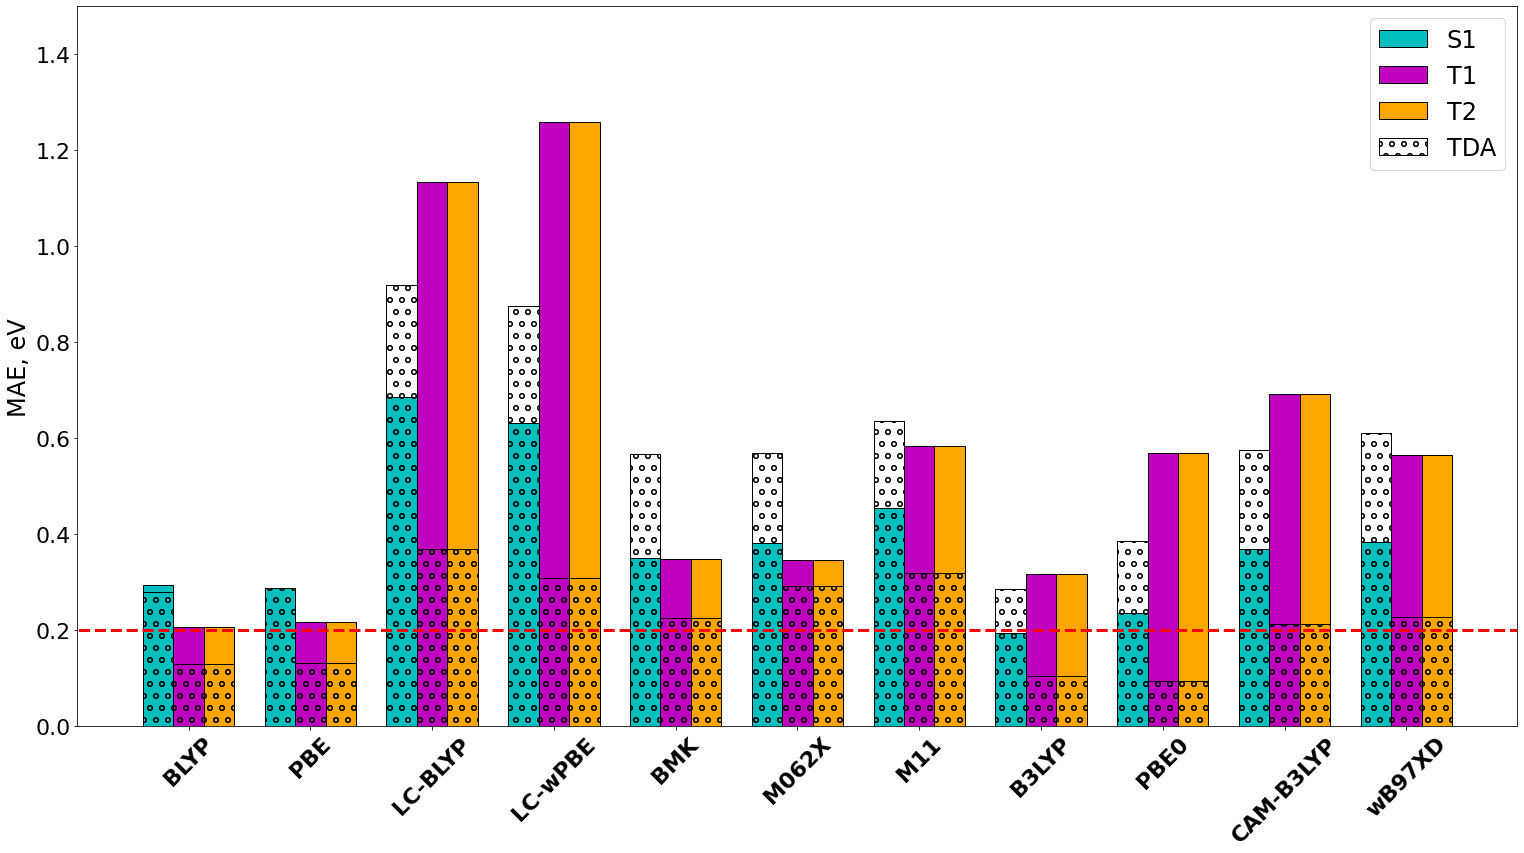

In [15]:
s1mse = calc_mae_mse(dfS1,"S1")
t1mse = calc_mae_mse(dfT1,"T1")
t2mse = calc_mae_mse(dfT2,"T2")

s1msetda = calc_mae_mse(dfS1,"S1", tda=True)
t1msetda = calc_mae_mse(dfT1,"T1", tda=True)
t2msetda = calc_mae_mse(dfT2,"T2", tda=True)

fig = plt.figure(figsize=(20,10))
fig.tight_layout(pad=5.0)
X = np.arange(s1mse.shape[0])
ax = fig.add_axes([0,0,1,1])

c1 = 'c'
c2 = 'm'
c3 = 'orange'

ax.tick_params(axis='both', labelsize=22)

ax.bar(X - 0.25, s1mse["MAE, eV"], color = c1, width = 0.25, label = "S1", edgecolor='black')
ax.bar(X + 0.00, t1mse["MAE, eV"], color = c2, width = 0.25, label = "T1", edgecolor='black')
ax.bar(X + 0.25, t1mse["MAE, eV"], color = c3, width = 0.25, label = "T2", edgecolor='black')

ax.bar(X - 0.25, s1msetda["MAE, eV"], color = 'none', width = 0.25, label = "TDA", hatch='o', edgecolor='black')
ax.bar(X + 0.00, t1msetda["MAE, eV"], color = 'none', width = 0.25, hatch='o', edgecolor='black')
ax.bar(X + 0.25, t1msetda["MAE, eV"], color = 'none', width = 0.25, hatch='o', edgecolor='black')

#ax.bar(X - 0.25, s1msetda["MAE, eV"], width = 0.25, label = "S1", hatch='x', edgecolor='black')

ax.set_xticks(X)
ax.set_xticklabels(list(s1mse["Functional"]), rotation=45, fontweight='bold')

ax.set_ylabel("MAE, eV", fontsize=24)
ax.axhline(0.2, -100, 100, linestyle='--',linewidth=3, color = 'red')
ax.set_ylim(0,1.5)
l = ax.legend(fontsize=24)
plt.savefig("MAE.png")
plt.show()

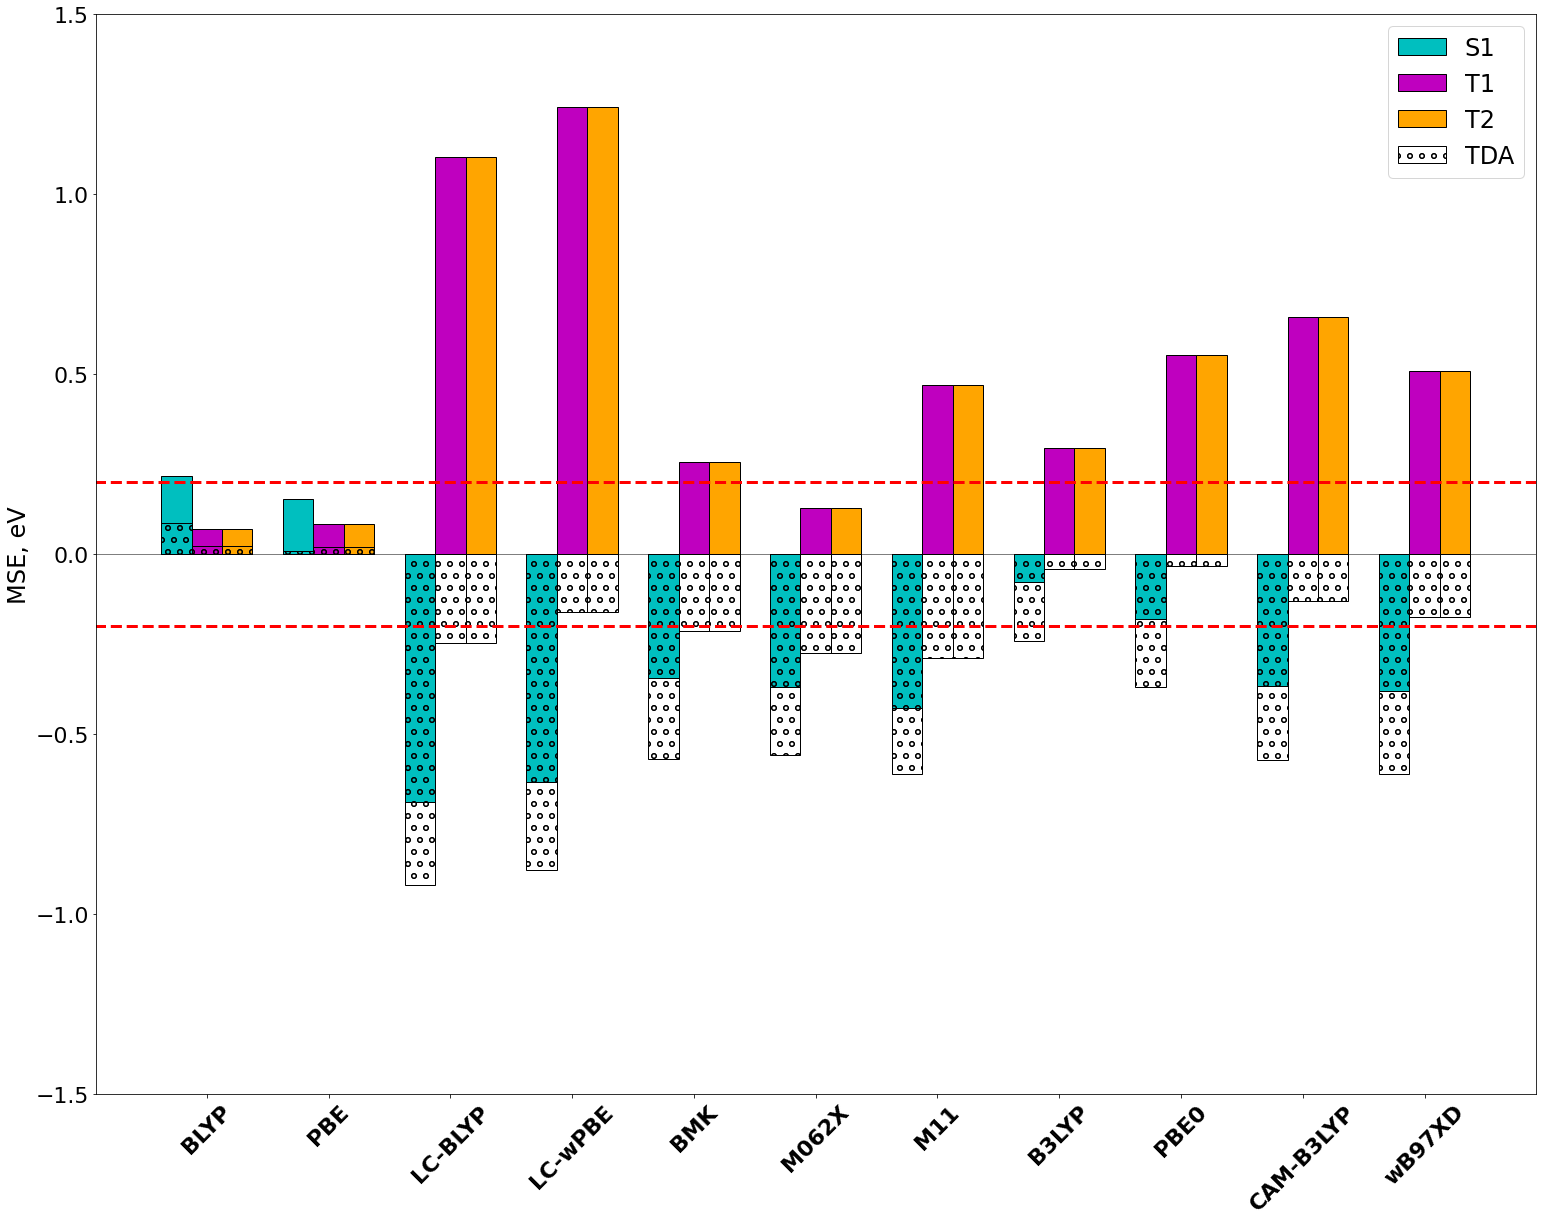

In [16]:
fig = plt.figure(figsize=(20,15))
X = np.arange(s1mse.shape[0])
ax = fig.add_axes([0,0,1,1])

c1 = 'c'
c2 = 'm'
c3 = 'orange'

ax.tick_params(axis='both', labelsize=22)

ax.bar(X - 0.25, s1mse["MSE, eV"], color = c1, width = 0.25, label = "S1", edgecolor='black')
ax.bar(X + 0.00, t1mse["MSE, eV"], color = c2, width = 0.25, label = "T1", edgecolor='black')
ax.bar(X + 0.25, t1mse["MSE, eV"], color = c3, width = 0.25, label = "T2", edgecolor='black')

ax.bar(X - 0.25, s1msetda["MSE, eV"], color = 'none', width = 0.25, label = "TDA", hatch='o', edgecolor='black')
ax.bar(X + 0.00, t1msetda["MSE, eV"], color = 'none', width = 0.25, hatch='o', edgecolor='black')
ax.bar(X + 0.25, t1msetda["MSE, eV"], color = 'none', width = 0.25, hatch='o', edgecolor='black')

#ax.bar(X - 0.25, s1msetda["MAE, eV"], width = 0.25, label = "S1", hatch='x', edgecolor='black')

ax.set_xticks(X)
ax.set_xticklabels(list(s1mse["Functional"]), rotation=45, fontweight='bold')

ax.axhline(0.2, -100, 100, linestyle='--',linewidth=3, color = 'red')
ax.axhline(-0.2, -100, 100, linestyle='--',linewidth=3, color = 'red')

ax.axhline(0.0, -100, 100, linewidth= 0.5, color = 'black')
ax.set_ylim(-1.5,1.5)

ax.set_ylabel("MSE, eV", fontsize=24)
l = ax.legend(fontsize=24)
plt.savefig("MSE.png")
plt.show()

FC
SC
FC, TDA
SC, TDA


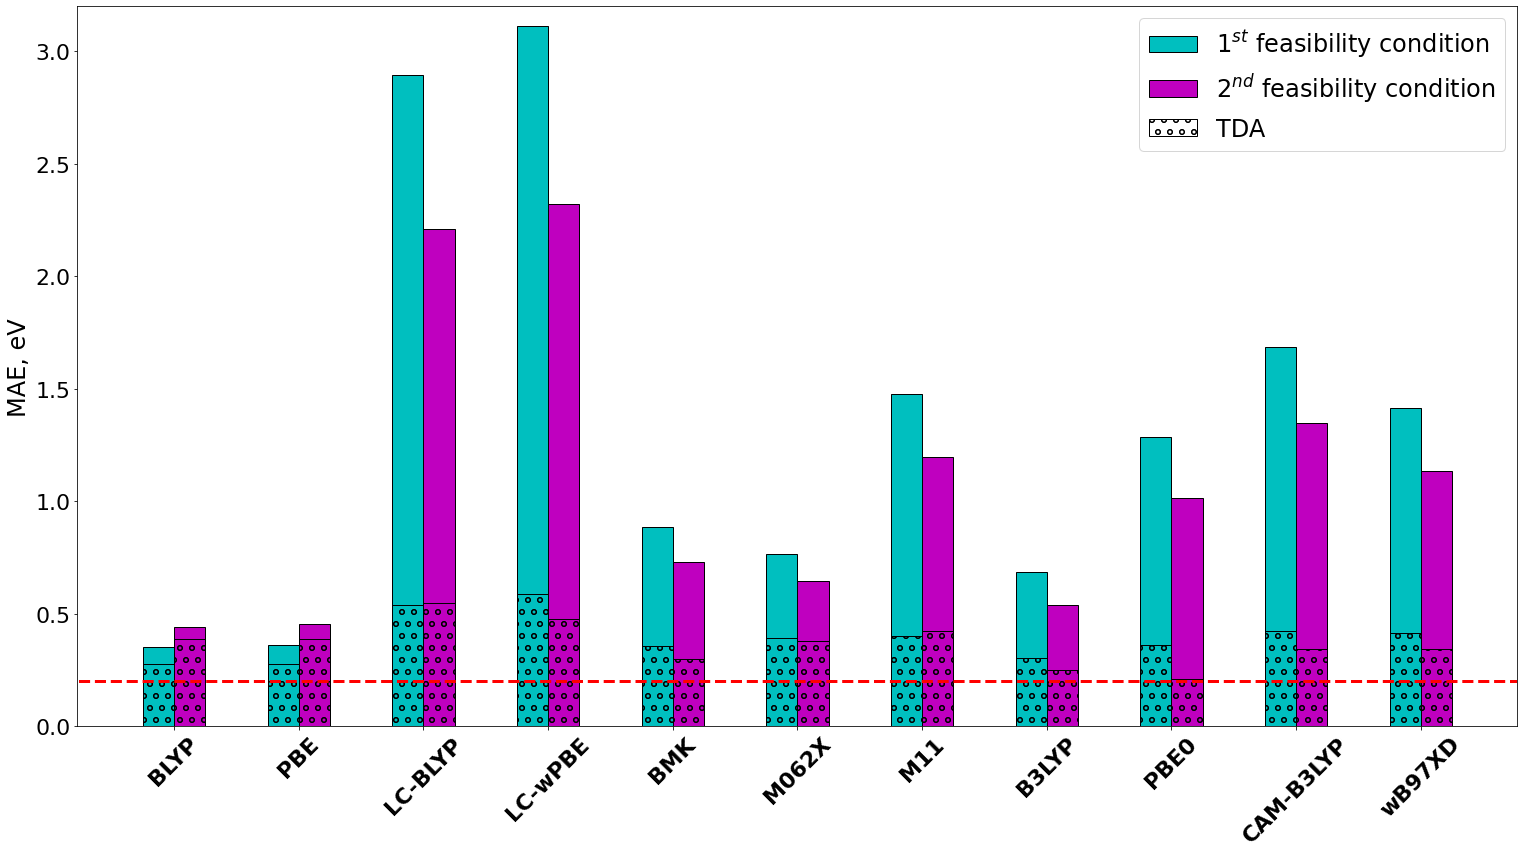

In [17]:
FCmse = calc_mae_mse(dfFC,"FC")
SCmse = calc_mae_mse(dfSC,"SC")

FCmsetda = calc_mae_mse(dfFC,"FC", tda=True)
SCmsetda = calc_mae_mse(dfSC,"SC", tda=True)

fig = plt.figure(figsize=(20,10))
fig.tight_layout(pad=5.0)
X = np.arange(s1mse.shape[0])
ax = fig.add_axes([0,0,1,1])

c1 = 'c'
c2 = 'm'

ax.tick_params(axis='both', labelsize=22)

ax.bar(X - 0.25/2, FCmse["MAE, eV"], color = c1, width = 0.25, label = "1$^{st}$ feasibility condition", 
       edgecolor='black')
ax.bar(X + 0.25/2, SCmse["MAE, eV"], color = c2, width = 0.25, label = "2$^{nd}$ feasibility condition", 
       edgecolor='black')

ax.bar(X - 0.25/2, FCmsetda["MAE, eV"], color = 'none', width = 0.25, label = "TDA", hatch='o', edgecolor='black')
ax.bar(X + 0.25/2, SCmsetda["MAE, eV"], color = 'none', width = 0.25, hatch='o', edgecolor='black')
#ax.bar(X + 0.25, t1msetda["MAE, eV"], color = 'none', width = 0.25, hatch='o', edgecolor='black')

#ax.bar(X - 0.25, s1msetda["MAE, eV"], width = 0.25, label = "S1", hatch='x', edgecolor='black')

ax.set_xticks(X)
ax.set_xticklabels(list(s1mse["Functional"]), rotation=45, fontweight='bold')

ax.set_ylabel("MAE, eV", fontsize=24)
ax.axhline(0.2, -100, 100, linestyle='--',linewidth=3, color = 'red')
ax.set_ylim(0,3.2)
l = ax.legend(fontsize=24)
#plt.savefig("MAE.png")
plt.show()

FC
SC
FC, TDA
SC, TDA


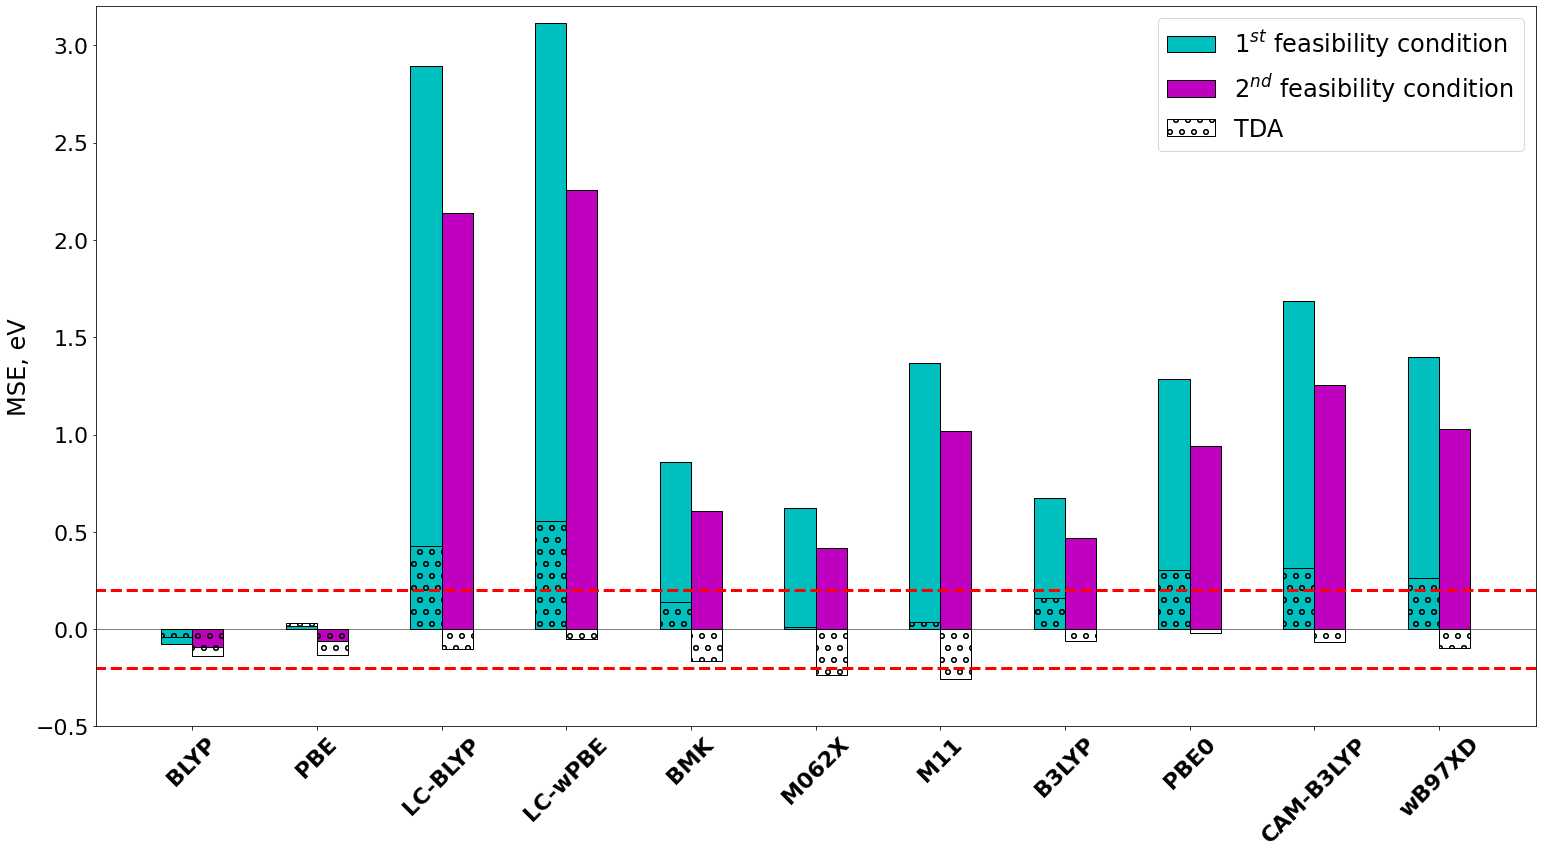

In [18]:
FCmse = calc_mae_mse(dfFC,"FC")
SCmse = calc_mae_mse(dfSC,"SC")

FCmsetda = calc_mae_mse(dfFC,"FC", tda=True)
SCmsetda = calc_mae_mse(dfSC,"SC", tda=True)

fig = plt.figure(figsize=(20,10))
fig.tight_layout(pad=5.0)
X = np.arange(s1mse.shape[0])
ax = fig.add_axes([0,0,1,1])

c1 = 'c'
c2 = 'm'

ax.tick_params(axis='both', labelsize=22)

ax.bar(X - 0.25/2, FCmse["MSE, eV"], color = c1, width = 0.25, label = "1$^{st}$ feasibility condition", 
       edgecolor='black')
ax.bar(X + 0.25/2, SCmse["MSE, eV"], color = c2, width = 0.25, label = "2$^{nd}$ feasibility condition", 
       edgecolor='black')

ax.bar(X - 0.25/2, FCmsetda["MSE, eV"], color = 'none', width = 0.25, label = "TDA", hatch='o', edgecolor='black')
ax.bar(X + 0.25/2, SCmsetda["MSE, eV"], color = 'none', width = 0.25, hatch='o', edgecolor='black')

ax.set_xticks(X)
ax.set_xticklabels(list(s1mse["Functional"]), rotation=45, fontweight='bold')

ax.set_ylabel("MSE, eV", fontsize=24)
ax.axhline(0.2, -100, 100, linestyle='--',linewidth=3, color = 'red')
ax.axhline(-0.2, -100, 100, linestyle='--',linewidth=3, color = 'red')
ax.axhline(0.0, -100, 100, linewidth= 0.5, color = 'black')
ax.set_ylim(-.5,3.2)
l = ax.legend(fontsize=24)
plt.savefig("MAE_FC.png")
plt.show()